## Parsing Dates
Dataset: Worldwide Earthquakes

In [1]:
# importing required modules
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

In [2]:
# loading dataset
earthquakes = pd.read_csv("Datasets/earthquakes.csv")
earthquakes.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [3]:
# datatype of Date column - object
earthquakes['Date'].dtype

dtype('O')

In [4]:
# checking fo rnull values in Date column
earthquakes['Date'].isna().sum()

0

In [5]:
# converting to datetime type
earthquakes['Date_parsed'] = pd.to_datetime(earthquakes['Date'], infer_datetime_format=True, errors='coerce')

In [6]:
earthquakes['Date_parsed'].head()

0   1965-01-02
1   1965-01-04
2   1965-01-05
3   1965-01-08
4   1965-01-09
Name: Date_parsed, dtype: datetime64[ns]

In [7]:
# 3 values have different date format
corrupted = earthquakes['Date'][earthquakes['Date_parsed'].isna()==True]
indices = corrupted.index

In [8]:
# converting them to proper date format
corrupted = pd.to_datetime([str(date)[:11] for date in corrupted])
earthquakes['Date_parsed'][indices] = corrupted

<ipython-input-8-86079f08f06c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  earthquakes['Date_parsed'][indices] = corrupted
C:\Users\Sastry\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [9]:
earthquakes['Date_parsed'][indices] 

3378    1975-02-23
7512    1985-04-28
20650   2011-03-13
Name: Date_parsed, dtype: datetime64[ns]

In [10]:
# getting day of month
day_of_month = earthquakes['Date_parsed'].dt.day
day_of_month.head()

0    2
1    4
2    5
3    8
4    9
Name: Date_parsed, dtype: int64

In [11]:
# drop NaN values
day_of_month = day_of_month.dropna()

C:\Users\Sastry\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Date_parsed'>

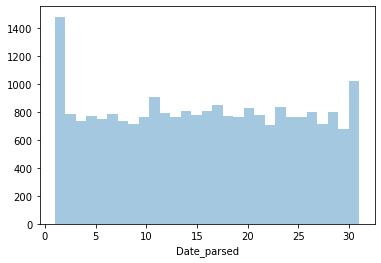

In [12]:
# plotting distribution of day_of_month
sns.distplot(day_of_month, kde=False)